## Import

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Exploring data

### Read cleaned data from file

In [31]:
df = pd.read_csv('../data/processed/data.csv', index_col=0)
df.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
7445,Movie,Merantau,Gareth Evans,"Iko Uwais, Sisca Jessica, Christine Hakim, Mad...",Indonesia,2019-02-13,2009,R,112 min,"Action & Adventure, Dramas, International Movies",2019,2
4018,Movie,Barcelona: A Love Untold,Olivia M. Lamasan,"Kathryn Bernardo, Daniel Padilla, Joshua Garci...",Philippines,2019-03-14,2016,TV-14,132 min,"Dramas, International Movies, Romantic Movies",2019,3
3759,Movie,Rolling Thunder Revue: A Bob Dylan Story by Ma...,Martin Scorsese,"Bob Dylan, Allen Ginsberg, Joan Baez, Patti Sm...",United States,2019-06-12,2019,TV-MA,142 min,"Documentaries, Music & Musicals",2019,6
1978,TV Show,Ratched,Unknown,"Sarah Paulson, Finn Wittrock, Judy Davis, Shar...",United States,2020-09-18,2020,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2020,9
3213,Movie,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",USA,2019-11-29,2018,TV-MA,118 min,"Comedies, International Movies",2019,11


### Question 1: What is the distribution of movie and tv show on Netflix?

**We want to know what is Netflix's main focus, is it movies or tv shows?**
  

First, we need to count the number of each type of content in the dataset and save it to a a dataframe `mf_ratio`

In [32]:
x=df['type'].value_counts()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

We then can use the `mf_ratio` dataframe to plot the distribution of movie and tv show on Netflix using a pie chart.

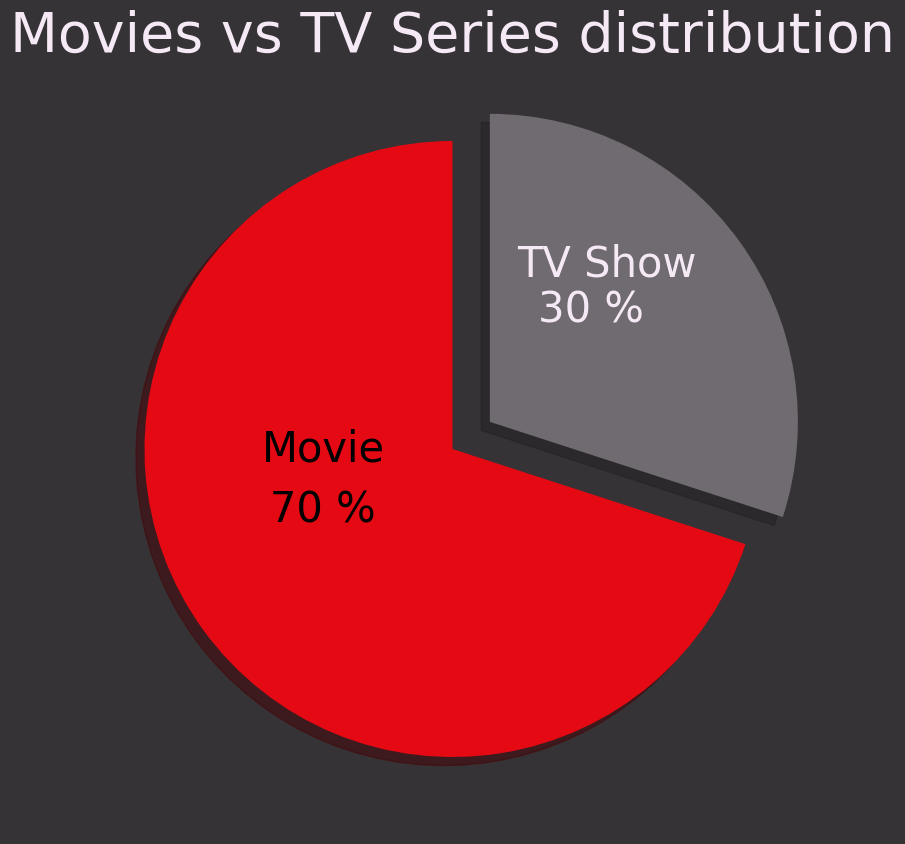

In [33]:
values = mf_ratio.values.flatten().tolist()
labels = mf_ratio.columns.tolist()
explode = (0, 0.15)
colors = ['#E50914', '#221f1f']  # Netflix red and dark color for the slices
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336")
plt.pie(x=values, shadow=True, explode=explode, colors =['#E50914','#706B70'], startangle=90)
plt.title('Movies vs TV Series distribution', color='#F5E9F5', fontsize=40)
ax.text(s=labels[0],x=-0.42,y=0,fontsize=30,va='center',ha='center')
ax.text(s=f'{values[0] * 100:.0f} %',x=-0.42,y=-0.2,fontsize=30,va='center',ha='center')

ax.text(s=labels[1],x=0.5,y=0.6, fontsize=30,color='#F5E9F5',va='center',ha='center')
ax.text(s=f'{values[1] * 100:.0f} %',x=0.45,y=0.45,fontsize=30,va='center',ha='center', color='#F5E9F5')
# Display the pie chart
plt.show()

2/3 of the content on Netflix is movies, while the rest is TV shows.

### Question 2: Growth of content over the years

For this question, we want to know how many tv shows/ movies are added to Netflix each year from 2000 to 2021.

First, we have to create 2 dataframes, one for movies and one for tv shows. We then count the number of movies/tv shows added each year and save it to a new dataframe `movie_count` and `tv_series_count`.

In [34]:
movies = df[df['type'] == 'Movie']
tv_series = df[df['type'] == 'TV Show']

movies_count = movies['release_year'].value_counts().sort_index()
tv_series_count = tv_series['release_year'].value_counts().sort_index()

Now, we can visualize the growth of content over the years using a line chart.

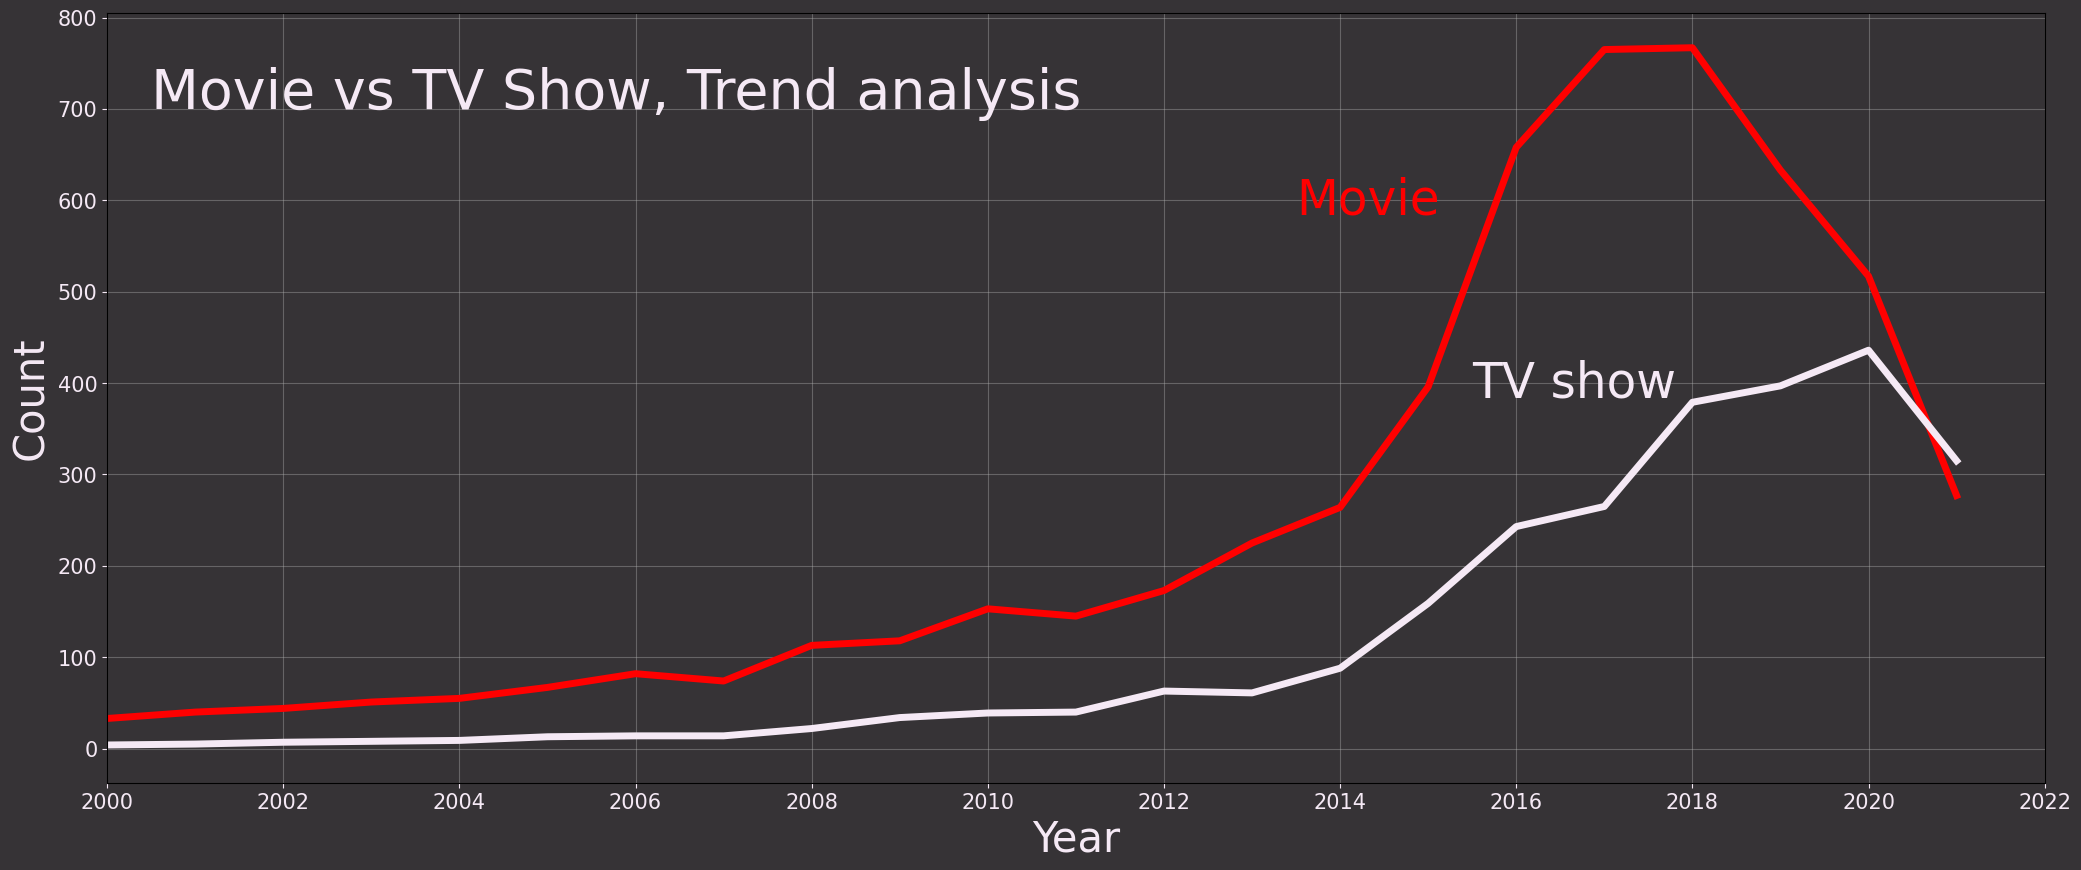

In [35]:
fig, ax = plt.subplots(figsize=(25, 10), facecolor="#363336")
ax.patch.set_facecolor('#363336')
ax.set_xticks(list(range(2000,2024,2)))
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlim(2000,2022)
sns.lineplot(x=movies_count.index, y=movies_count.values, color='red', ax=ax, linewidth=5)
sns.lineplot(x=tv_series_count.index, y=tv_series_count.values, color='#F5E9F5', ax=ax, linewidth=5)
ax.text(s="Movie vs TV Show, Trend analysis", x= 2000.5,y=700,color='#F5E9F5',fontsize=40)
ax.text(s="Movie", x=2013.5, y= 600,color='red', va="center",ha="left",fontsize=35)
ax.text(s="TV show", x=2015.5, y= 400,color='#F5E9F5', va="center",ha="left",fontsize=35)
ax.grid(True, alpha=0.4)
ax.set_xlabel('Year', fontsize=30, color='#F5E9F5')
ax.set_ylabel('Count', fontsize=30, color='#F5E9F5')
plt.show()


Both movies and TV shows have been growing over the years and the growth of movies is faster than tv shows. But since 2019, movies dropped significantly while tv shows still grew but not as fast as before, due to the pandemic.

### 